<h4> Predicting Charges and running regression </h4>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
ins = pd.read_csv('Project3_Jupyter/insurance.csv')
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [3]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [4]:
#Cleaning the data
ins_filled = ins.copy()
ins_filled.dropna(inplace=True)

In [5]:
#Modifying the dataset columns

In [6]:
ins_filled['region'] = ins_filled['region'].str.lower()
ins_filled['smoker'].unique()
to_num = {'yes': 1, 'no': 0}

ins_filled['smoker'] = ins_filled['smoker'].map(to_num)


In [7]:
ins_filled['smoker']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1208, dtype: int64

In [8]:
mapped = {'woman': 0, 'man': 1, 'F': 0, 'M': 1, 'female': 0, 'male': 1}
ins_filled['sex'] = ins_filled['sex'].map(mapped)
ins_filled['sex']

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1208, dtype: int64

In [9]:
ins_filled.sample(10)
ins_filled['charges'] = ins_filled['charges'].str.replace('$', ' ').astype(np.float64)
ins_filled['children'] = ins_filled['children'].astype(np.int64)


In [10]:
ins_filled['charges']

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1208, dtype: float64

In [11]:
col_abs = ['charges', 'children', 'age']
for col in col_abs:
    ins_filled[col] = ins_filled[col].abs()

In [12]:
ins_filled.sample(10)

,age,sex,bmi,children,smoker,region,charges
437,35.0,1,28.900,3,0,southwest,5926.84600
180,58.0,1,28.595,0,0,northwest,11735.87905
458,56.0,1,39.600,0,0,southwest,10601.41200
1134,28.0,1,33.820,0,0,northwest,19673.33573
781,18.0,1,41.140,0,0,southeast,1146.79660
991,38.0,0,27.835,2,0,northeast,7144.86265
696,53.0,0,32.300,2,0,northeast,29186.48236
1261,28.0,1,37.100,1,0,southwest,3277.16100
1070,37.0,1,37.070,1,1,southeast,39871.70430
435,60.0,1,33.110,3,0,southeast,13919.82290


1. Is there any relationship between 'age' and 'charges' columns, divide by whether they are smoker or not?

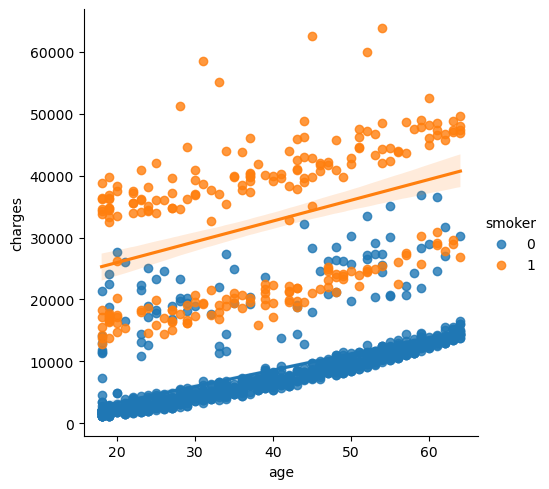

In [13]:
plt_df = ins_filled.copy()
sns.lmplot(x='age', y='charges', hue='smoker', data= plt_df)
plt.show()

We find that there is a roughly linear relationship between the 'age' and 'charges' column. Also, as likely it felt, those who are smoker have higher charges as compared to those are not. However they is presence of outliers making us analyse not whole data can be explained by just these parameters.

2. Is there a connection between 'bmi' and the 'charges'?

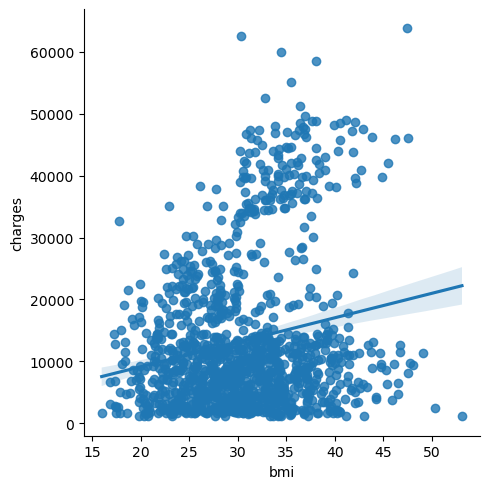

In [14]:
sns.lmplot(x='bmi', y='charges', data=plt_df)
plt.show()

Not whole data can be analysed by these two parameters and there is a linear relationship between them but fairly weak.

In [ ]:
#Dummy Encoding

In [15]:
df_new = pd.get_dummies(plt_df, prefix=['region'], columns= ['region'])
df_new = df_new.drop(columns=['region_southeast'])
df_new.rename(columns={'smoker': 'is_smoker', 'sex': 'is_male'}, inplace= True)
df_new= df_new.dropna()
df_new.head()

,age,is_male,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southwest
0,19.0,0,27.900,0,1,16884.92400,False,False,True
1,18.0,1,33.770,1,0,1725.55230,False,False,False
2,28.0,1,33.000,3,0,4449.46200,False,False,False
3,33.0,1,22.705,0,0,21984.47061,False,True,False
4,32.0,1,28.880,0,0,3866.85520,False,True,False


In [7]:
#Putting the data into test, checking R_squared

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


X = df_new.drop(columns=['charges'])
Y = df_new['charges']



X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

r2 = r2_score(Y_test, Y_pred)

r2

0.7049323160872816

The R Squared gives us the healthy inference to explain how much other parameters in the dataset have an impact on 'Charges', especially more by 'Smoker' column.

In [8]:
#Validating our regression model into the dataset.

In [17]:
val_df = pd.read_csv('Project3_Jupyter/validation_dataset.csv')
val_df.head()

,age,sex,bmi,children,smoker,region
0,18.0,female,24.090000,1.0,no,southeast
1,39.0,male,26.410000,0.0,yes,northeast
2,27.0,male,29.150000,0.0,yes,southeast
3,71.0,male,65.502135,13.0,yes,southeast
4,28.0,male,38.060000,0.0,no,southeast


In [9]:
#Making the data fit like the previous ones.

In [18]:
def helper(df):
    df_new = pd.get_dummies(df, prefix=['region'], columns= ['region'])
    df_new = df_new.drop(columns=['region_southeast'])
    df_new.rename(columns={'smoker': 'is_smoker', 'sex': 'is_male'}, inplace= True)
    df_new['is_smoker'] = df_new['is_smoker'].map({'yes': 1, 'no':0})
    df_new['is_male'] = df_new['is_male'].map({'female': 0, 'male':1})
    df_new['is_male'] = df_new['is_male'].astype('int64')
    return df_new

In [19]:
validation= helper(val_df)
pred = model.predict(validation)
pred

array([ 3.52537878e+02,  3.09562147e+04,  2.77994096e+04,  5.71944148e+04,
        6.68542631e+03,  5.86778384e+04,  7.04440596e+03,  1.30656580e+04,
        1.26657036e+04,  1.61425411e+04,  2.52853835e+03,  1.44317748e+04,
        1.13808735e+04,  1.20997623e+04,  2.69587308e+03,  3.72888611e+03,
        4.25657672e+04,  6.43384787e+04,  5.93902149e+04,  1.15252685e+04,
       -5.82951707e+01,  1.28982287e+04,  3.24813915e+04,  1.21666342e+04,
        9.75512982e+03,  5.09785330e+03,  5.90920861e+04,  3.34504228e+03,
        1.18776338e+04,  1.05767394e+04,  6.18916893e+03,  2.72111048e+04,
        3.11411087e+04,  1.34473395e+04,  3.26866927e+04,  1.39288587e+04,
        5.91570393e+04,  1.44799199e+04, -2.37352284e+02,  2.97924065e+04,
        3.02110368e+04,  1.17286358e+04,  3.73534807e+03,  6.05651275e+04,
        5.62647547e+03,  4.02915840e+04,  6.83106824e+04,  3.06084743e+04,
        1.50741321e+04,  3.55325780e+04])

In [10]:
#Getting the predicted Charges

In [24]:
pred_new = [x if x>0 else 1000 for x in pred]
validation_data = val_df.copy()
validation_data['Predicted Charges'] = pred_new
validation_data.head()

,age,sex,bmi,children,smoker,region,Predicted Charges
0,18.0,female,24.090000,1.0,no,southeast,352.537878
1,39.0,male,26.410000,0.0,yes,northeast,30956.214707
2,27.0,male,29.150000,0.0,yes,southeast,27799.409607
3,71.0,male,65.502135,13.0,yes,southeast,57194.414804
4,28.0,male,38.060000,0.0,no,southeast,6685.426312


Thank You!